In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd

df = pd.read_csv("air_quality.csv")
df.head()

,Temperature,Humidity,Wind Speed,Pressure,Cloud Cover,Latitude,Longitude,pm2_5
0,28.5,65,3.2,1012,40,17.3850,78.4867,52
1,30.1,70,2.1,1010,60,13.0827,80.2707,68
2,26.8,55,4.5,1015,20,12.9716,77.5946,34
3,32.0,75,1.8,1008,70,28.7041,77.1025,92
4,29.4,60,3.9,1013,35,19.0760,72.8777,48


In [19]:
df.shape

(10, 8)

In [21]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Pressure', 'Cloud Cover',
       'Latitude', 'Longitude', 'pm2_5'],
      dtype='object')

In [23]:
df.dtypes

Temperature    float64
Humidity         int64
Wind Speed     float64
Pressure         int64
Cloud Cover      int64
Latitude       float64
Longitude      float64
pm2_5            int64
dtype: object

In [29]:
df.isnull().sum()  #no missing values were found in the data set

Temperature    0
Humidity       0
Wind Speed     0
Pressure       0
Cloud Cover    0
Latitude       0
Longitude      0
pm2_5          0
dtype: int64

In [31]:
df.describe()

,Temperature,Humidity,Wind Speed,Pressure,Cloud Cover,Latitude,Longitude,pm2_5
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,29.30000,64.500000,3.240000,1012.200000,46.000000,17.696370,78.127290,58.300000
std,2.40878,9.119576,1.191824,3.190263,21.959559,6.550321,4.097101,24.335845
min,25.60000,50.000000,1.600000,1007.000000,15.000000,9.925200,72.877700,28.000000
25%,27.92500,58.500000,2.200000,1010.250000,31.250000,12.999375,76.079425,39.000000
50%,28.95000,63.500000,3.400000,1012.500000,42.500000,16.351150,77.348550,50.500000
75%,31.15000,71.500000,4.125000,1014.750000,63.750000,21.698450,78.394975,77.750000
max,33.20000,78.000000,5.000000,1016.000000,80.000000,28.704100,88.363900,95.000000


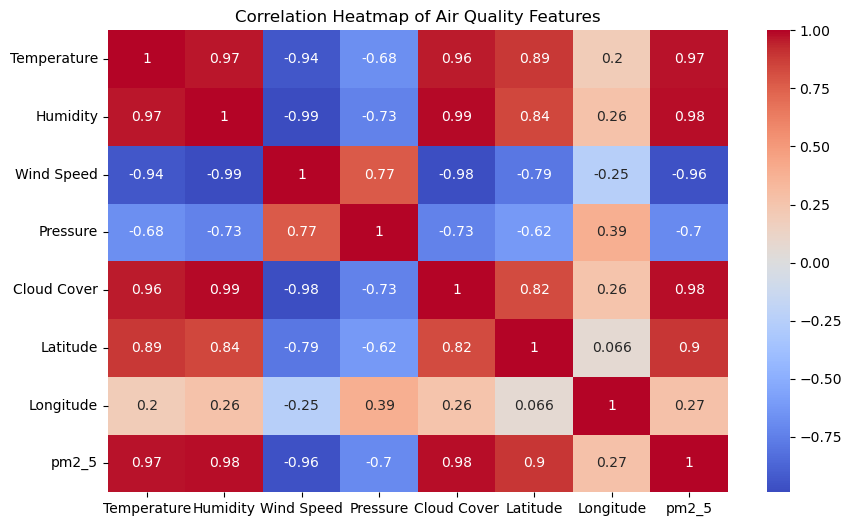

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()

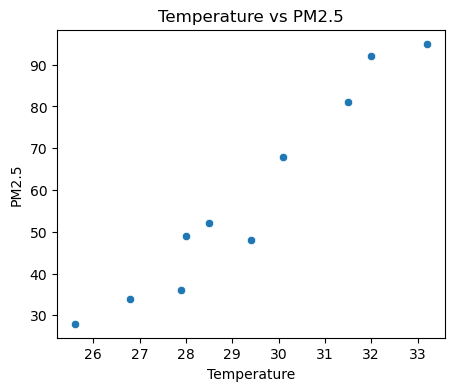

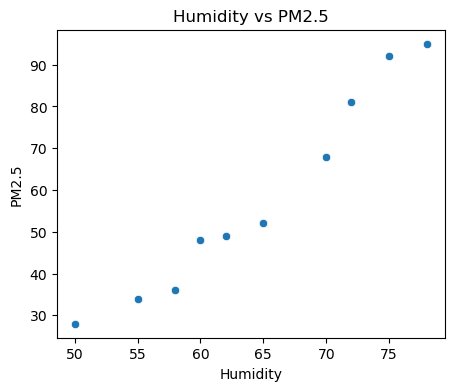

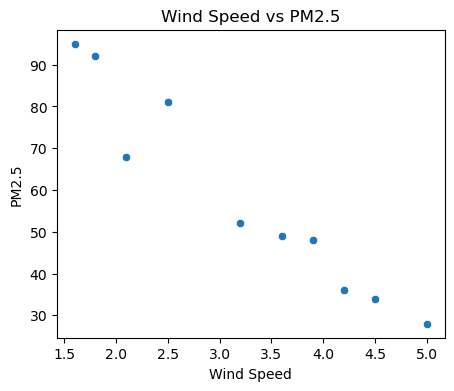

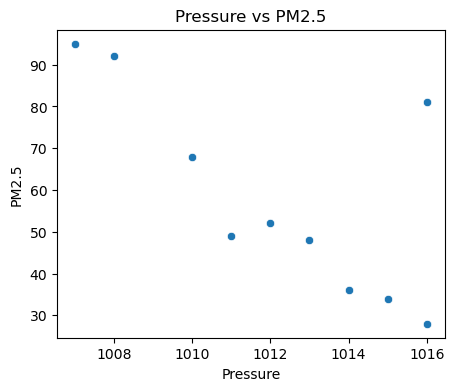

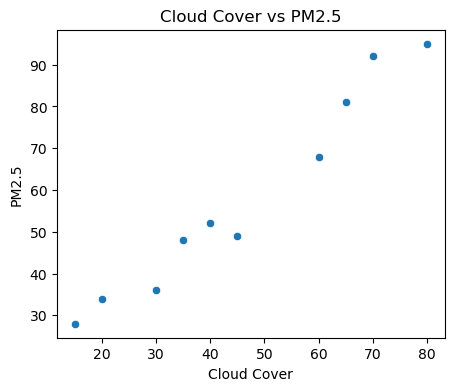

In [35]:
features = [
    "Temperature",
    "Humidity",
    "Wind Speed",
    "Pressure",
    "Cloud Cover"
]

for col in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df["pm2_5"])
    plt.title(f"{col} vs PM2.5")
    plt.xlabel(col)
    plt.ylabel("PM2.5")
    plt.show()

In [37]:
X = df.drop("pm2_5", axis=1)
y = df["pm2_5"]

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [41]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = lr_model.predict(X_test)
y_pred

array([92.71748471, 63.80043878])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.2410382563557505
Root Mean Squared Error (RMSE): 3.3798069846969154
